In [ ]:
########################################################################
# Author    : A. Alsema
# Date      : Nov 2023
# Dataset   : Visium Spatial Transcriptomics for MS lesions, 15 slices with WM 
# Purpose   : plot a Seurat module score on a UMAP with the trajectory

# Required Inputs     : 
# - cds object for plotting the trajectory: "3.monocle_traj_WM_allgenes.rds"
# - csv file with module score per spot: "celltype-modulescores.csv"
# - outdir: path to store PDF plots

# Output    : PDF plots, including those corresponding to figure 6b
########################################################################

In [3]:
rm(list = ls())
library(monocle3)
library(Seurat)
library(ggplot2)
library(dplyr)
library(magick)
library(cowplot)
library(RColorBrewer)
outdir = "Routput/monocle3/umap_modulescores_celltypes/"

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading

In [12]:
#' Plot Module Score of a Geneset
#'
#' This function generates plots to visualize the module score of a given geneset
#' using UMAP coordinates.
#'
#' @param module_data A data frame containing the UMAP coordinates, spot barcodes, and module scores. 
#'                    The data frame should have columns named "UMAP_1", "UMAP_2", and a column
#'                    corresponding to the \code{current_geneset}.
#' @param current_geneset A string representing the name of the geneset column in \code{module_data} 
#'                        that contains the module scores to be plotted.
#'
#' @return A list containing two ggplot objects. The first plot (`plot2`) does not include a legend,
#'         and the second plot (`plot3`) includes a legend. Both plots display the module scores 
#'         using a color gradient.
#'
#' # Plot the module scores for the geneset "mOLGs1"
#' module_plots <- plot_modules(module_data = data_plot, current_geneset = "mOLGs1")
#' 


colfunc <- colorRampPalette(c("lightgrey", "lemonchiffon1", "lemonchiffon2","tan1", "firebrick2", "firebrick3"))             
expression_cols <- colfunc(10)

plot_modules <- function(module_data, current_geneset){
    print('plotting')
    print(current_geneset)
    plot2 <- ggplot(data = module_data) + 
        geom_point(aes_string(x="UMAP_1", y = "UMAP_2", color = as.character(current_geneset)), alpha = 1, size = 0.3) +
        scale_colour_gradientn(colours = expression_cols) + 
        theme_void() +
        scale_x_continuous(limits = c(-7, 6)) +
        scale_y_continuous(limits = c(-5, 6)) +
                theme(legend.position = "none")
    # plot to save legend
    plot3 <- ggplot(data = module_data) + 
        geom_point(aes_string(x="UMAP_1", y = "UMAP_2", color = as.character(current_geneset)), alpha = 1, size = 0.3) +
        scale_colour_gradientn(colours = expression_cols) + 
        theme_void() +
        scale_x_continuous(limits = c(-7, 6)) +
        scale_y_continuous(limits = c(-5, 6))
    
    module_plots <- list(plot2, plot3)
    return(module_plots)
    }


## Load data

In [13]:
# load data for plot1
cds <- readRDS("RData/monocle3/3.monocle_traj_WM_allgenes.rds")
cds

class: cell_data_set 
dim: 33538 55084 
metadata(1): cds_version
assays(1): counts
rownames(33538): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(1): gene_short_name
colnames(55084): AAACAAGTATCTCCCA-1_1 AAACACCAATAACTGC-1_1 ...
  TTGTTTCCATACAACT-1_15 TTGTTTGTGTAAATTC-1_15
colData names(29): seu_integrated_barcode orig.ident ... UMAP1_monoc
  UMAP2_monoc
reducedDimNames(1): UMAP
mainExpName: NULL
altExpNames(0):

In [4]:
# load gene module score data that will be plotted
data_plot <- read.csv("RData/monocle3/celltype-modulescores.csv")
head(data_plot)
## now extract the gene modules names to loop over
genesets <- colnames(data_plot[4:ncol(data_plot)])
genesets     

,X,UMAP_1,UMAP_2,mOLGs1,OPCs1,fibroblasts1,vasculature1,AIMS1,mitochondrial1,Hs7_phago_mg1,WM_astrocytes1,plasma_cells_spl1,MIMS.iron1,MIMS.foamy1,Inflamed_Bloodvessels1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AAACAAGTATCTCCCA-1_1,3.906103,-0.7297680,3.495140,0.4435382,-0.04093182,-0.06432211,0.9575206,2.903357,-0.08770184,0.1929255,-0.2791183,0.2731446,-0.1812118,-0.1105490
2,AAACACCAATAACTGC-1_1,-1.044688,5.1122291,2.951214,-0.5944699,-0.03421244,-0.07624495,1.2486839,2.998684,0.21645142,-0.5049041,-0.3157139,1.2246201,-0.1736683,0.5624857
3,AAACAGAGCGACTCCT-1_1,4.436505,-3.5233548,2.926161,-0.7376533,-0.05519616,-0.12452264,1.5198948,3.027320,-0.24885842,-0.1767723,-0.3953131,1.2071318,-0.2921525,-0.1012025
4,AAACAGCTTTCAGAAG-1_1,3.532302,0.6115111,2.795001,0.1004456,-0.05825572,0.07816556,1.8208412,3.094019,0.20074915,0.5542346,-0.3875054,1.0194617,-0.2569386,-0.1138309
5,AAACAGGGTCTATATT-1_1,2.387068,0.8603760,2.476338,0.1462792,-0.08102826,-0.08704264,1.9036230,3.184052,-0.13631210,0.6967564,-0.3201751,0.9033246,-0.2371575,0.1423293
6,AAACAGTGTTCCTGGG-1_1,5.000101,-3.1876929,1.948258,-0.7043813,-0.06219124,0.08142970,1.6060998,2.644844,0.17429875,-0.6655050,-0.3795914,1.1889379,-0.1370984,-0.3539848


[1] "mOLGs1"                 "OPCs1"                  "fibroblasts1"          
 [4] "vasculature1"           "AIMS1"                  "mitochondrial1"        
 [7] "Hs7_phago_mg1"          "WM_astrocytes1"         "plasma_cells_spl1"     
[10] "MIMS.iron1"             "MIMS.foamy1"            "Inflamed_Bloodvessels1"

## plot

Cells aren't colored in a way that allows them to be grouped.



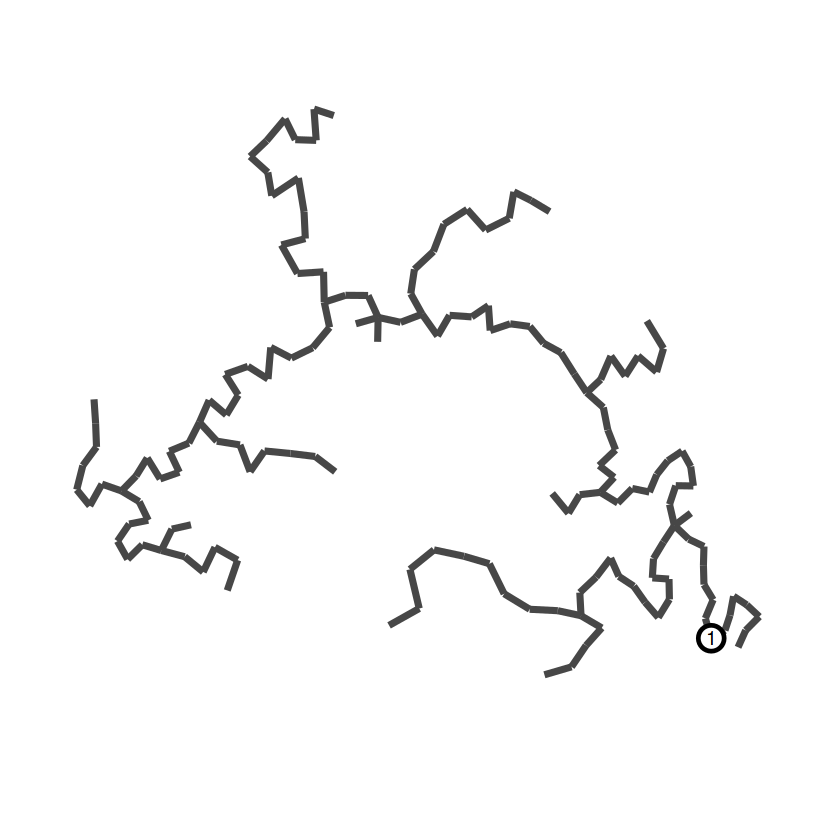

In [14]:
# plot1 is plotting only the trajectory
plot1 <- plot_cells(cds,
                   cell_size = 0.5,
                   alpha = 0,
                   color_cells_by = "pseudotime",
                   label_groups_by_cluster=FALSE,
                   label_leaves=FALSE,
                   label_roots = TRUE,
                   label_branch_points=FALSE,
                   trajectory_graph_segment_size = 1.5,
                   graph_label_size= 4) +
            theme_void() + 
            scale_x_continuous(limits = c(-7, 6)) +
            scale_y_continuous(limits = c(-5, 6)) + 
            theme(legend.position = "none")
plot1

In [ ]:
# combine and export module score UMAP with traj plot1 
                     
for (geneset in genesets){
    pdf(paste0(outdir, geneset, ".pdf"))
    module_plots <- plot_modules(module_data = data_plot, current_geneset = as.character(geneset))
    print(ggdraw() + 
      draw_plot(module_plots[[1]]) + 
      draw_plot(plot1))
    print(module_plots[[2]])
    dev.off()
}

In [5]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/bcn/p283607/anaconda3/envs/R4.2/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] RColorBrewer_1.1-3          cowplot_1.1.1              
 [3] magick_2.7.3                dplyr_1.1.4                
 [5] ggplot2_3.4.4               SeuratObject_5.0.1         
 [7] Seurat_4.3.0                monocle3_1.3.1             
 [9] SingleCellExperiment_1.20.1 SummarizedE

In [ ]:
## optional for tiffs
# for (geneset in genesets){
#     tiff(paste0("Routput/monocle/genelists/", geneset, ".tiff"), units = "in", width = 8, height = 8, res = 300)
#     print(plot_genelist(cds, geneset))
#     dev.off()
# }

In [3]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/bcn/p283607/anaconda3/envs/R4.2/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] RColorBrewer_1.1-3          cowplot_1.1.1              
 [3] magick_2.7.3                dplyr_1.1.4                
 [5] ggplot2_3.4.4               SeuratObject_5.0.1         
 [7] Seurat_4.3.0                monocle3_1.3.1             
 [9] SingleCellExperiment_1.20.1 SummarizedE